# Basic Algorithmic Learning

## Linear Regression Models

In [1]:
#This is a machine learning algorithm you can use to quantify and make predictions based on relationships between 
#two numerical values

#This model has a number of assumptions:
#Data is continuous and numerical
#Data is not missing any values and does not have any outliers
#Theres a linear relationship between predictors and predicants
# All predictors are independent of each other, no correlation with each other
#Residuals(prediction errors) are normally distributed

In [1]:
#Lets import our libraries

import numpy as np
import seaborn as sb
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from collections import Counter

In [3]:
#Lets set our plotting parameters

%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [139]:
#Lets import the dataset
link='/Users/afatade/Desktop/Data Science with Python/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch08/08_01/enrollment_forecast.csv'
enroll=pd.read_csv(link)

In [140]:
len(enroll)

29

In [5]:
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


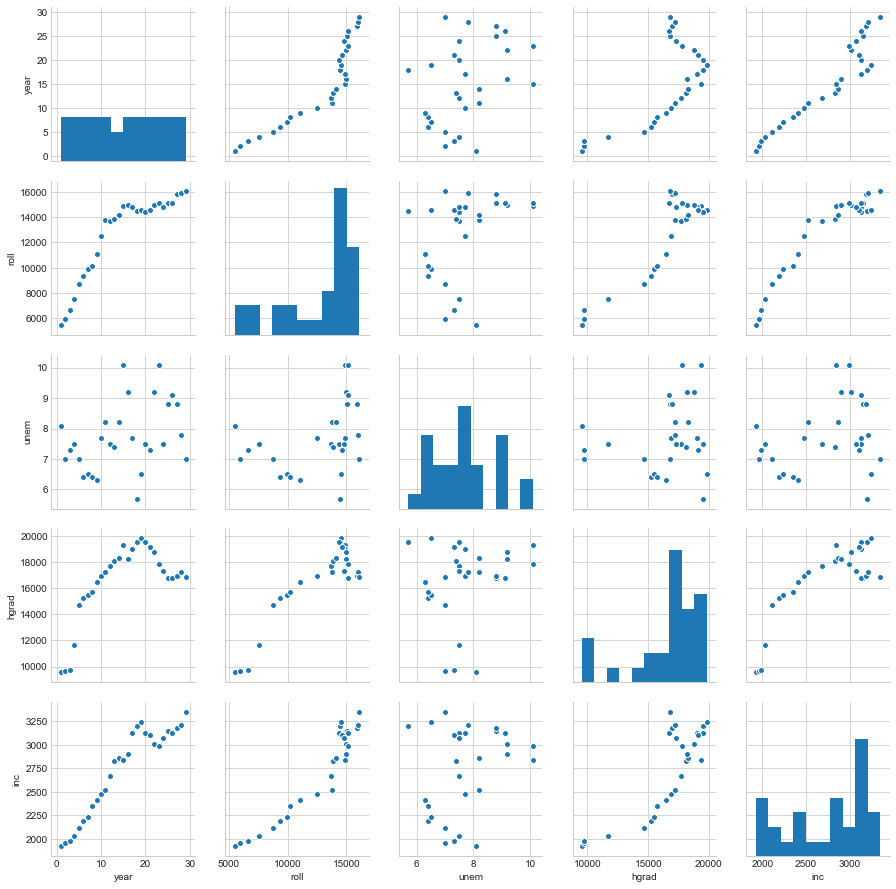

In [6]:
#Lets generate a scatterplot matrix to see what variables have a linear relationship
sb.pairplot(enroll)

In [7]:
#The linearity between unem and roll could be stronger, but we will call this good enough to use for predictions
#each of our variables is also continuously numeric!

#We will be making use of the unem and hgrad columns. But we want to make sure there is NO CORRELATION
#between our PREDICTORS.
enroll.corr()

,year,roll,unem,hgrad,inc
year,1.000000,0.900934,0.378305,0.670300,0.944287
roll,0.900934,1.000000,0.391344,0.890294,0.949876
unem,0.378305,0.391344,1.000000,0.177376,0.282310
hgrad,0.670300,0.890294,0.177376,1.000000,0.820089
inc,0.944287,0.949876,0.282310,0.820089,1.000000


In [8]:
#We can see that correlation between h grad and unem is very low. Great!
#Lets split our data into features and targets

enroll_data=enroll.iloc[:, [2,3]].values
target=enroll.iloc[:, 1].values
enroll_data_names=['unem', 'hgrad']

#It is also good to scale our data before feeding it into a classifier
X=scale(enroll_data)
y=target

In [9]:
X

array([[ 0.34682081, -2.42562243],
       [-0.64989846, -2.38111647],
       [-0.37806593, -2.36338363],
       [-0.19684425, -1.69057879],
       [-0.64989846, -0.64434118],
       [-1.19356352, -0.43919655],
       [-1.10295268, -0.36304964],
       [-1.19356352, -0.27994868],
       [-1.28417436, -0.00943593],
       [-0.01562256,  0.12582044],
       [ 0.43743166,  0.23465141],
       [-0.19684425,  0.4098936 ],
       [-0.28745509,  0.5493224 ],
       [ 0.43743166,  0.60425944],
       [ 2.15903768,  0.96656572],
       [ 1.34354009,  0.58965593],
       [-0.01562256,  0.85843016],
       [-1.82783942,  1.03506316],
       [-1.10295268,  1.13763548],
       [-0.19684425,  1.04931898],
       [-0.37806593,  0.90015449],
       [ 1.34354009,  0.78089244],
       [ 2.15903768,  0.44675009],
       [-0.19684425,  0.26976938],
       [ 0.98109672,  0.07922827],
       [ 1.25292925,  0.07679435],
       [ 0.98109672,  0.13799004],
       [ 0.07498828,  0.24438708],
       [-0.64989846,

### Check for missing values

In [10]:
#Lets check our data if it has any missing values
data=pd.DataFrame(X)
data.isnull().sum()

0    0
1    0
dtype: int64

In [11]:
#We have no missing values

In [12]:
#Lets instantiate a linear regression model. We should always set normalize to true. This tells the model to 
#normalize our variables before regression

LinReg=LinearRegression(normalize=True)
LinReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [13]:
#Lets print out a score for our model
print(LinReg.score(X,y))

0.8488812666133723


In [14]:
#We have 84% accuracy. A larger dataset would yield more insights

In [15]:
LinReg.predict([[ 0.34682081, -2.42562243]])

array([6400.8493098])

In [16]:
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


In [49]:
val=enroll_data[1:5]

In [50]:
val

array([[7.0000e+00, 9.6800e+03],
       [7.3000e+00, 9.7310e+03],
       [7.5000e+00, 1.1666e+04],
       [7.0000e+00, 1.4675e+04]])

In [55]:
#What if you want to use new data that has to be scaled? You can use the standard scaler library to remember the
#scaling of your training data.

#Fit in the unscaled data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(enroll_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
val=scaler.transform(val)

In [59]:
LinReg.predict(val)

array([ 5753.36581515,  6010.90237422,  7973.86171426, 10460.03870404])

In [62]:
val=[[8.1,9552]]
val=scaler.transform(val)

In [63]:
LinReg.predict(val)

array([6400.84932255])

## Logistic Regression

In [64]:
#Logistic regression is a simple machine learning algorithm you can use to predict numeric categorical variables.
#This differs from linear regression, as in this case, you are predicting categories for ordinal variables, while in 
#linear regression, you are predicting numerical variables for numeric continous variables

#It takes assumptions such that data is free from missing values
#There are at least 50 observations for reliable results
#All predictors are independent of each other
#The predictant variable is binary(there are only two) or a categorical variable with ordered values

#Lets import our libraries

import numpy as np
import seaborn as sb
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from collections import Counter

In [65]:
#Lets set our plotting parameters

%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

## Logistic Regression on mtcars

In [2]:
link='/Users/afatade/Desktop/Data Science with Python/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch08/08_02/mtcars.csv'
cars=pd.read_csv(link)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
cars.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [4]:
cars.columns=['Car Type', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb']

In [5]:
cars.head()

,Car Type,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [75]:
corrs=cars.corr(method='spearman')

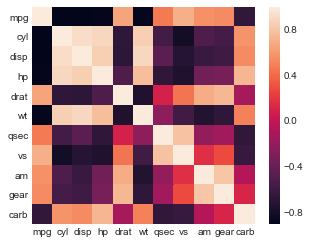

In [76]:
sb.heatmap(corrs)

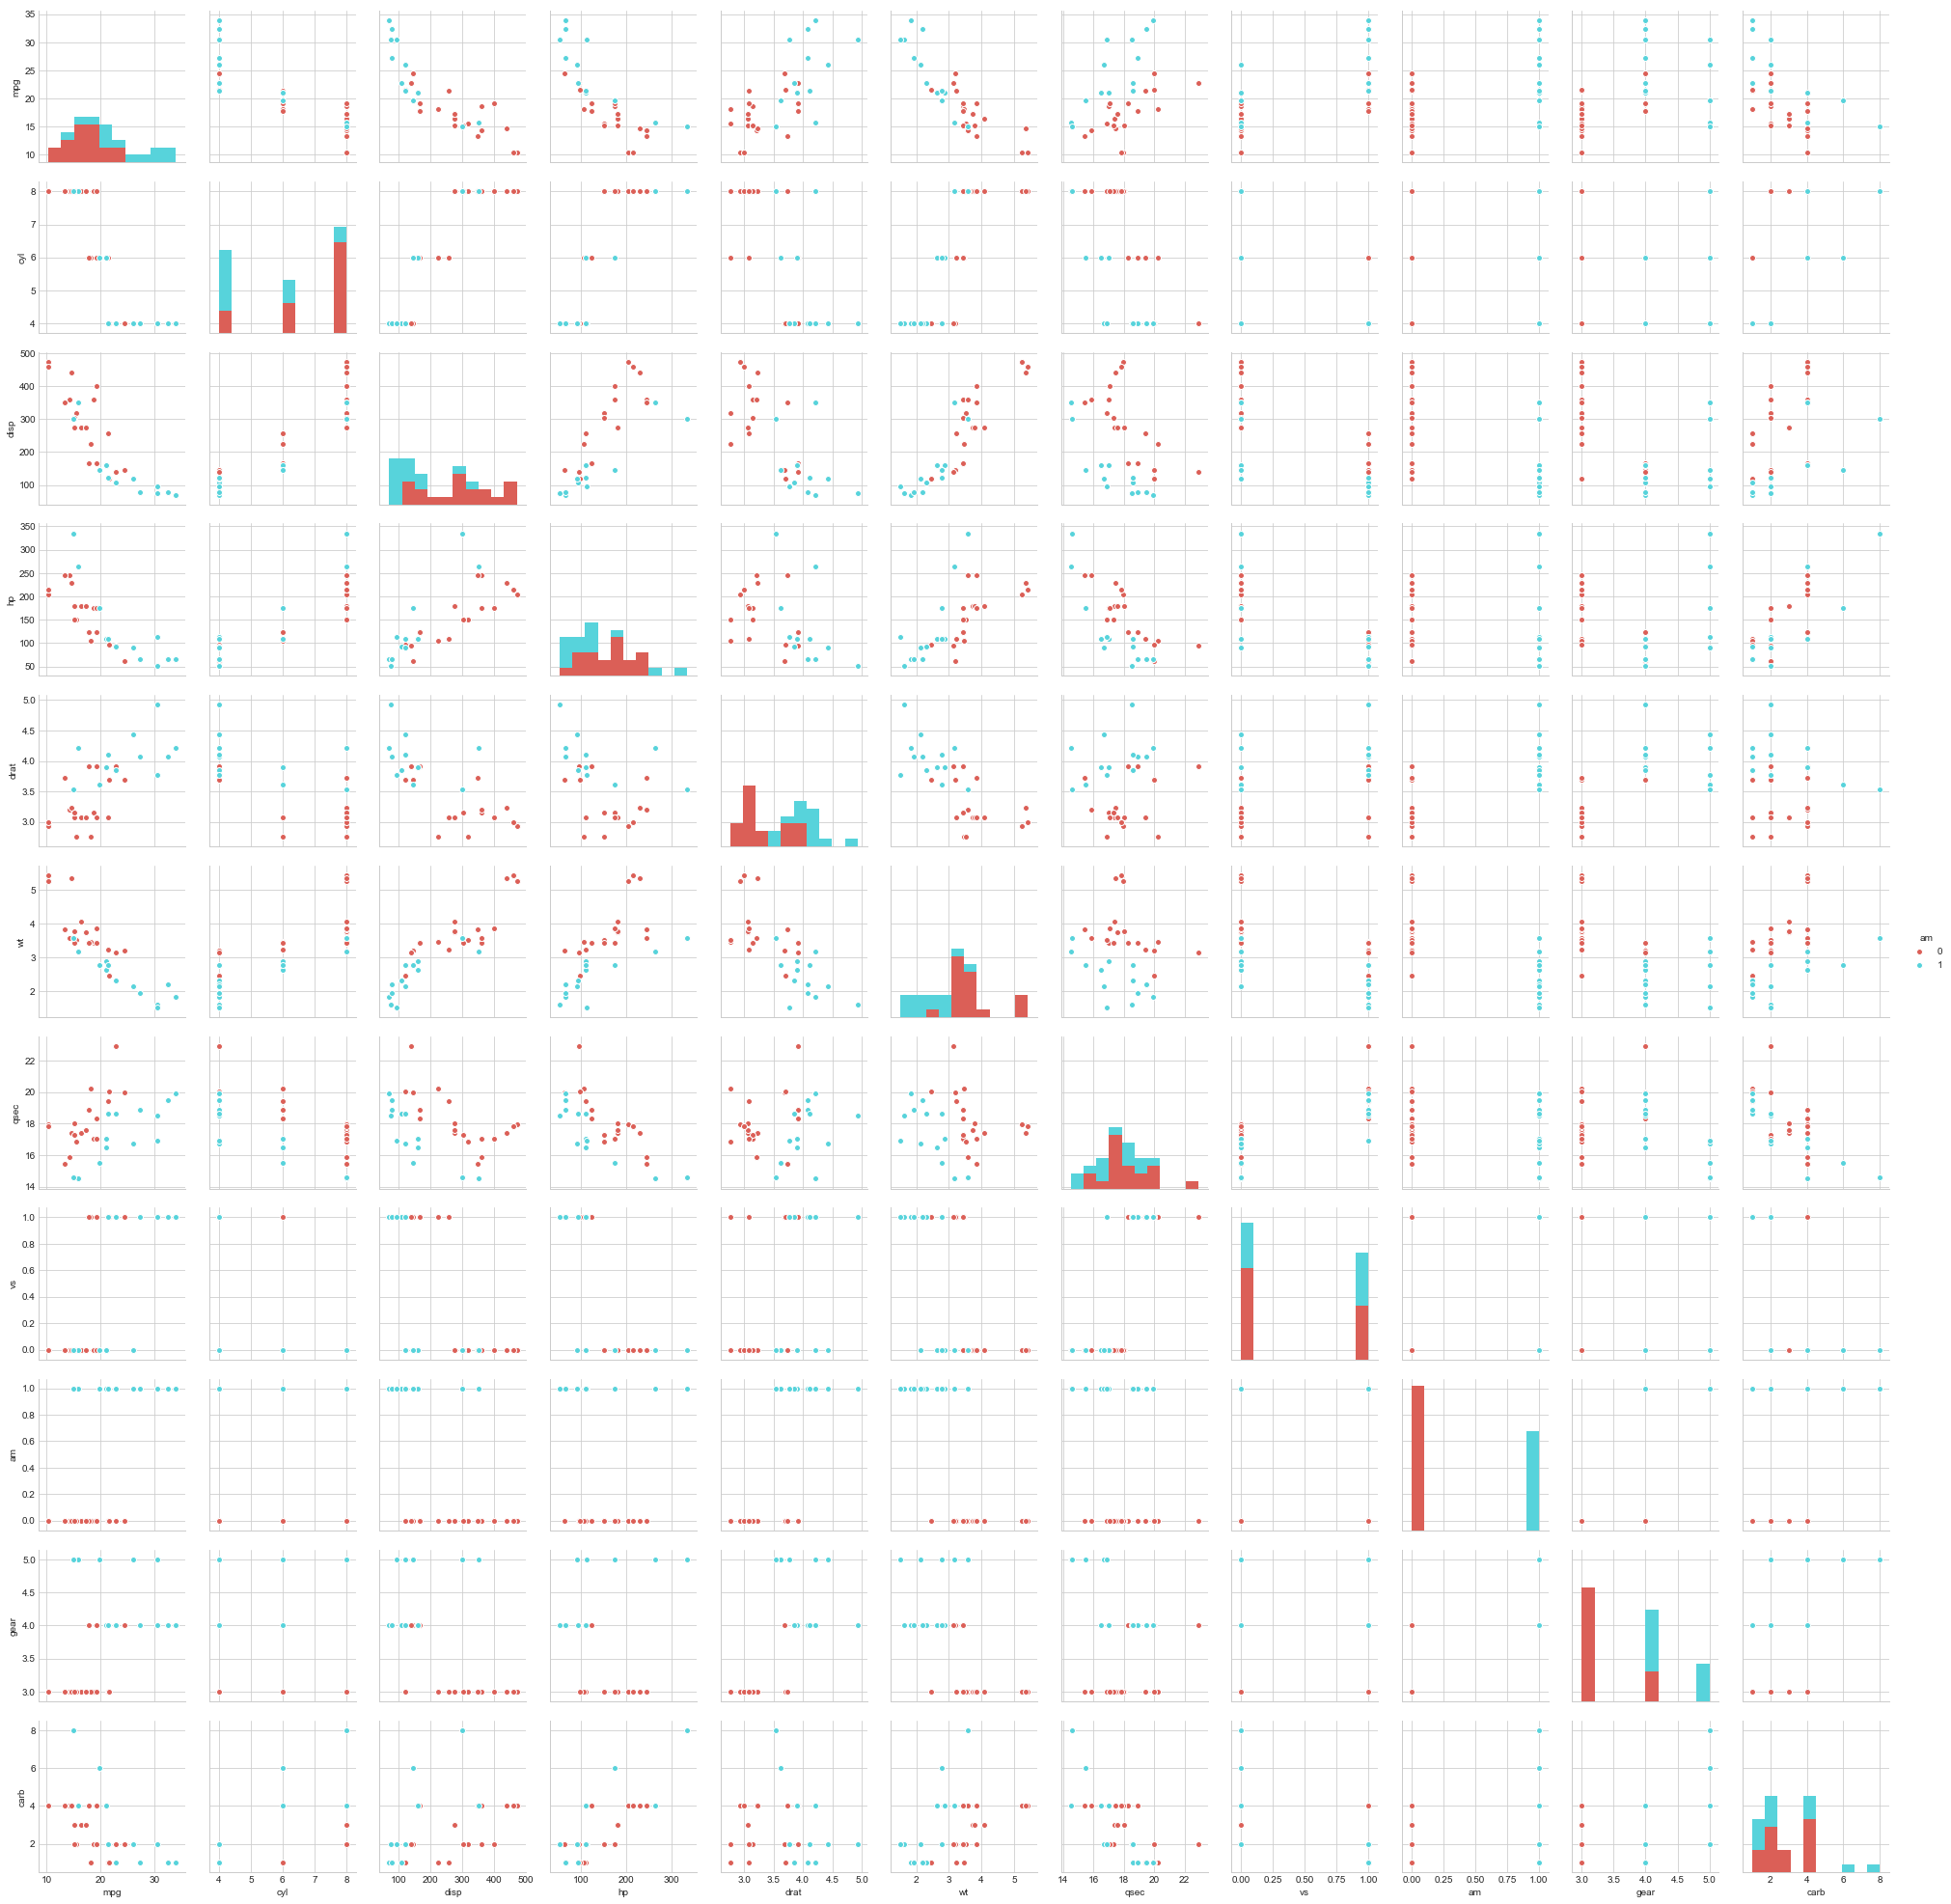

In [74]:
sb.pairplot(cars, hue='am', palette='hls')

In [77]:
#Since we want to predict a category, such as am, a logistic regression model should work.
#But what variables shall we use?

#We have to pick two variables which must be categorical variables with ordered data.
#We see that mpg, wt, qsec, disp and hp all seem to be continuous numeric variables. Lets filter them 
#out and generate another heatmap.
cars.columns

Index(['Car Type', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

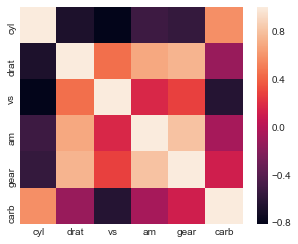

In [79]:
cars_subset=cars.iloc[:,[2,5,8,9,10,11]]
cars_corr=cars_subset.corr(method='spearman')
sb.heatmap(cars_corr)

In [6]:
cars_subset=cars.iloc[:,[2,5,8,9,10,11]]
cars_subset.head()

,cyl,drat,vs,am,gear,carb
0,6,3.90,0,1,4,4
1,6,3.90,0,1,4,4
2,4,3.85,1,1,4,1
3,6,3.08,1,0,3,1
4,8,3.15,0,0,3,2


In [15]:
cars_subset.groupby(['am'])

In [17]:
cars_groups.mean()

,cyl,drat,vs,gear,carb
am,,,,,
0,6.947368,3.286316,0.368421,3.210526,2.736842
1,5.076923,4.050000,0.538462,4.384615,2.923077


In [ ]:
#It is worth noting, that carb, gear, drat and cyl have some form of correlation with am. 
#Lets say we decide to pick two. Which ones will we pick?
#They're all categorical variables, but we want to make use of predicants that are independent of each other
#and have more of a spread of categories.

In [82]:
cars['carb'].value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [83]:
cars['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [84]:
cars['vs'].value_counts()

0    18
1    14
Name: vs, dtype: int64

In [85]:
cars['drat'].value_counts()

3.07    3
3.92    3
2.76    2
3.15    2
3.08    2
4.08    2
4.22    2
3.90    2
4.43    1
3.00    1
3.73    1
3.21    1
4.11    1
3.85    1
3.69    1
3.54    1
4.93    1
3.23    1
3.77    1
3.70    1
3.62    1
2.93    1
Name: drat, dtype: int64

In [86]:
cars['gear'].value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [87]:
#We see that carb and drat have a wider range of categorical data so we will use those two. 
#But are they independent of each other?

cars_subset.head()

,cyl,drat,vs,am,gear,carb
0,6,3.90,0,1,4,4
1,6,3.90,0,1,4,4
2,4,3.85,1,1,4,1
3,6,3.08,1,0,3,1
4,8,3.15,0,0,3,2


In [88]:
#Lets reduce our data further
cars_data=cars_subset.iloc[:,[1,5]]
cars_data.head()

,drat,carb
0,3.90,4
1,3.90,4
2,3.85,1
3,3.08,1
4,3.15,2


In [89]:
cars_data.corr(method='spearman')

,drat,carb
drat,1.000000,-0.125223
carb,-0.125223,1.000000


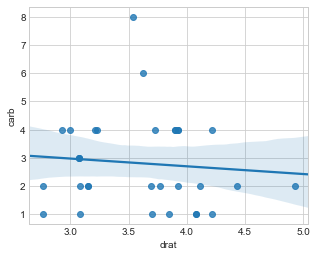

In [90]:
#We see that they have little to no correlation to one another! They're good to go.
#Lets also print out our data on a scatterplot
sb.regplot(x='drat', y='carb', data=cars_data)

In [91]:
#We can see that the data we are working with are ordinal variables! as they are categorized

### Check for No missing values

In [92]:
cars_data.isnull().sum()

drat    0
carb    0
dtype: int64

In [93]:
#We see we have no missing values in our dataset.

### Check if your target variable is binary or ordinal

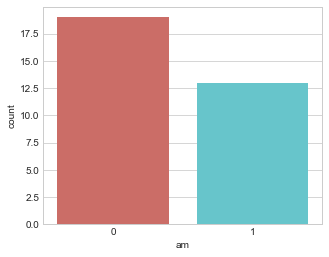

In [95]:
#Our target variable is am. Lets see if it is binary or ordinal.
#We can use a countplot for this.

sb.countplot(x='am', data=cars, palette='hls')

In [96]:
#Great! We can see that we have a binary target variable.
#Now lets check if our data meets the 50 count record requirement.

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Car Type    32 non-null object
mpg         32 non-null float64
cyl         32 non-null int64
disp        32 non-null float64
hp          32 non-null int64
drat        32 non-null float64
wt          32 non-null float64
qsec        32 non-null float64
vs          32 non-null int64
am          32 non-null int64
gear        32 non-null int64
carb        32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [97]:
#We see we only have 32 entries. This could be a potential problem so in the future we want to make sure
#that the data we make use of has at least 50 entries


### Deploying and Evaluating your model

In [102]:
#Now that we have confirmed that these variables will work, lets scale our data and split it into training
#and testing data

X=scale(cars_data.values)
y=cars.iloc[:,9].values

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.33)

In [105]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [106]:
#Lets instantiate and fit the model
LogReg=LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
#Lets print out our score
LogReg.score(X,y)

0.875

In [110]:
#We have an accuracy of 87.5%
#Lets use the classsification report to base our model on precision and recall
yPred=LogReg.predict(X)
print(metrics.classification_report(y,yPred))

             precision    recall  f1-score   support

          0       1.00      0.79      0.88        19
          1       0.76      1.00      0.87        13

avg / total       0.90      0.88      0.88        32



In [111]:
#We have 90% precision and 88% completeness. This is a good model.

## Naive Bayes Classifier

In [112]:
#A naive bayes classifier is a machine learning algorithm you can use to predict the likelihood that an 
#event will occur given evidence thats present in your data

#There are three types of Naive Bayes classifier- Multinomial, Bernoulli and Gaussian.

#Multinomial-Good for when your features,(categorical or continuous) describe discrete frequency counts, e.g word count
#Bernoulli= Good for making predictions from binary values
#Gaussian- Good for making predictions on normally distributed data.

In [113]:
#The model has assumptions such that are predictors are independent of one another, 
#and your data has an a priori assumption: this is an assumption that the past condition holds true. When we make prediction
#from historical values, we will get incorrect results if present circumstances change

#All regression models maintain an a priori assumption.

#Lets import our libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import urllib

from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Using Naive Bayes to predict spam

In [115]:
#Our dataset can be found online so lets use the urllib library to read it in.
url='https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
raw_data=urllib.request.urlopen(url)

In [117]:
#Lets convert it to some data using numpy. We will read it in as a txt file, but we remember to use a comma delimiter
dataset=np.loadtxt(raw_data, delimiter=',')
dataset[0]

array([  0.   ,   0.64 ,   0.64 ,   0.   ,   0.32 ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.64 ,   0.   ,   0.   ,
         0.   ,   0.32 ,   0.   ,   1.29 ,   1.93 ,   0.   ,   0.96 ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.778,   0.   ,   0.   ,   3.756,  61.   ,
       278.   ,   1.   ])

In [120]:
#Taking a closer look at our dataset we can see it seems to be standardized, so we dont have to scale it.
#Furthermore, we want to work with variables taht desscribe discrete frequency counts e.g word counts.
#The first 48 variables in this dataset relate to word count, so lets use that data as our input
#Our target variable seems to be binary; either 1 or 0 so we set the last column to our target.

X=dataset[:,0:48]
y=dataset[:,-1] #quick way to access the last column in our datasset

In [123]:
len(X[0])

48

In [128]:
#Lets split our data into testing and training data
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.33, random_state=7)

#Our dataset set compromises of continous variables that describe frequency word count, so multinomial is our 
#best option. However, we can also try Bernoulli with binning to convert frequency counts to binary values 
#and Guassian too.

In [129]:
BernNB= BernoulliNB(binarize=True) #This will bin our data into binary data
BernNB.fit(X_train, y_train)

yPred=BernNB.predict(X_test)
print(accuracy_score(y_test, yPred))

0.8492429229756419


In [130]:
MultiNB=MultinomialNB()
MultiNB.fit(X_train, y_train)

yPred=MultiNB.predict(X_test)
print(accuracy_score(y_test, yPred))

0.8683344305464121


In [131]:
Gauss= GaussianNB()
Gauss.fit(X_train, y_train)
yPred=Gauss.predict(X_test)
print(accuracy_score(y_test, yPred))

0.8090849242922976


In [132]:
#We see that the mulinomial NB has the highest level of accuracy, but the other classifiers perform well.

In [133]:
#What if we modify our bin width in the Bernoulli Naive Bayes classifier?

BernNB= BernoulliNB(binarize=0.1) #This will bin our data into binary data
BernNB.fit(X_train, y_train)

yPred=BernNB.predict(X_test)
print(accuracy_score(y_test, yPred))

0.8815009874917709


In [ ]:
#We now get an accuracy of 88.15. It would be best to make use of the NaiveBayes for larger datasets and
#it would be wise to evaluate all three models.